正在加载模型...
Loads checkpoint by local backend from path: /home/jovyan/workspace/FINISH_TRAIN_MODEL/cascade-rcnn_r50_fpn_1x_v1/best_coco_bbox_mAP_epoch_92.pth
模型加载完成！
正在读取图片...
图片形状: (4096, 3072, 3)
正在执行目标检测...
检测完成！
检测到 1 个目标


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

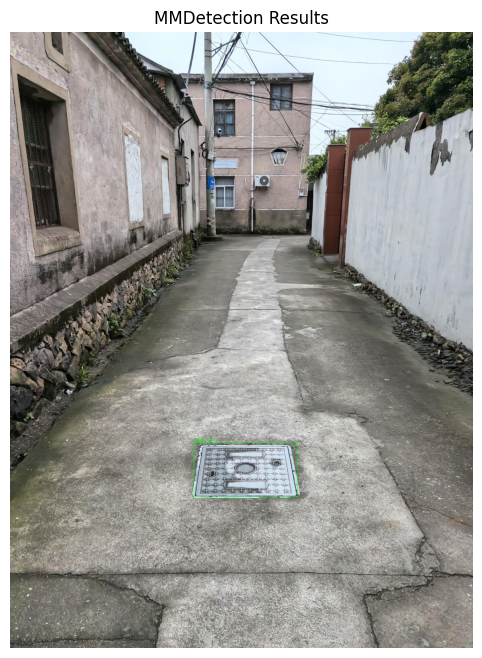


检测结果:
目标 1: 类别=pothole, 置信度=0.998, 边界框=[1220.0, 2729.6, 1905.5, 3087.1]


In [16]:
# 导入必要的库
import mmcv
from mmengine import Config
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 初始化MMDetection
register_all_modules()

# 设置路径
config_path = '/home/jovyan/workspace/FINISH_TRAIN_MODEL/cascade-rcnn_r50_fpn_1x_v1/20251117_114151/vis_data/config.py'
checkpoint_path = '/home/jovyan/workspace/FINISH_TRAIN_MODEL/cascade-rcnn_r50_fpn_1x_v1/best_coco_bbox_mAP_epoch_92.pth'
image_path = '/home/jovyan/workspace/YOLO_DATASET/images/flipped_IMG_20240412_180255.jpg'

print("正在加载模型...")
# 加载模型配置和权重
config = Config.fromfile(config_path)
model = init_detector(config, checkpoint_path, device='cuda:0')  # 如果没有GPU，使用 'cpu'
print("模型加载完成！")

print("正在读取图片...")
# 读取图片
img = mmcv.imread(image_path)
print(f"图片形状: {img.shape}")

print("正在执行目标检测...")
# 执行推理
result = inference_detector(model, img)
print("检测完成！")

# 获取类别名称
if hasattr(model, 'dataset_meta'):
    class_names = model.dataset_meta.get('classes', [])
else:
    class_names = config.get('class_name', [])

# 设置阈值
score_thr = 0.3

# 获取检测框
pred_instances = result.pred_instances
bboxes = pred_instances.bboxes.cpu().numpy()
scores = pred_instances.scores.cpu().numpy()
labels = pred_instances.labels.cpu().numpy()

# 过滤低置信度的检测框
valid_indices = scores > score_thr
bboxes = bboxes[valid_indices]
scores = scores[valid_indices]
labels = labels[valid_indices]

print(f"检测到 {len(bboxes)} 个目标")

# 绘制结果
img_with_bbox = img.copy()
for bbox, score, label in zip(bboxes, scores, labels):
    bbox_int = bbox.astype(np.int32)
    label_text = f'{class_names[label] if class_names else label}: {score:.2f}'
    
    # 绘制边界框
    cv2.rectangle(img_with_bbox, (bbox_int[0], bbox_int[1]), (bbox_int[2], bbox_int[3]), (0, 255, 0), 2)
    
    # 绘制标签和置信度
    cv2.putText(img_with_bbox, label_text, (bbox_int[0], bbox_int[1] - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# 显示结果
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img_with_bbox, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('MMDetection Results')
plt.show()

# 打印检测结果
print("\n检测结果:")
for i, (bbox, score, label) in enumerate(zip(bboxes, scores, labels)):
    print(f"目标 {i+1}: 类别={class_names[label] if class_names else label}, "
          f"置信度={score:.3f}, 边界框=[{bbox[0]:.1f}, {bbox[1]:.1f}, {bbox[2]:.1f}, {bbox[3]:.1f}]")